In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.awa_interface import AWAInterface

# import data from csv file
import pandas as pd
variable_file = "plugins/environments/awa_variables.csv"
observable_file = "plugins/environments/awa_observables.csv"
variable_info = pd.read_csv(variable_file).set_index("NAME")
observable_info = pd.read_csv(observable_file).set_index("NAME").T

variables = variable_info[["MIN","MAX"]].T.to_dict()
observables = list(observable_info.keys())

for name in variables:
    variables[name] = [variables[name]["MIN"], variables[name]["MAX"]]
observables

env = AWAEnvironment(variable_file, observable_file, interface=AWAInterface(), target_charge=1.0)

In [2]:
meas = env.get_screen_measurement("13ARV1",["AWAVXI11ICT:Ch1"])

CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: awa5:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Mon Jun 19 2023 15:12:28.652565652
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: awa5:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Mon Jun 19 2023 15:12:28.653254883
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: awa5:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Mon Jun 19 2023 15:12:28.653719125
..................................................................
CA.Client.Exception........

In [3]:
meas

{'13ARV1:image1:ArraySize0_RBV': 1920,
 'AWAVXI11ICT:Ch1': 1.0818762938781904e-09,
 '13ARV1:image1:ArraySize1_RBV': 1200,
 '13ARV1:Cx': 323.579223041157,
 '13ARV1:Cy': 246.6289212192446,
 '13ARV1:Sx': 11.574205840681998,
 '13ARV1:Sy': 45.47604404025929,
 '13ARV1:bb_penalty': -148.30079650957794,
 '13ARV1:total_intensity': 1967054,
 '13ARV1:log10_total_intensity': 6.293816282430835}

In [4]:
meas = env.get_observables(["13ARV1:Sx"])

In [5]:
meas

{'13ARV1:image1:ArraySize0_RBV': 1920.0,
 'AWAVXI11ICT:Ch1': 1.031827598666755e-09,
 '13ARV1:image1:ArraySize1_RBV': 1200.0,
 '13ARV1:Cx': 324.6616630466675,
 '13ARV1:Cy': 247.96756752068896,
 '13ARV1:Sx': 32.0405854651617,
 '13ARV1:Sy': 32.861306856006266,
 '13ARV1:bb_penalty': -148.8167943030471,
 '13ARV1:total_intensity': 2334832.6,
 '13ARV1:log10_total_intensity': 6.365813690570325,
 '13ARV1:image1:ArraySize0_RBV_std': 0.0,
 'AWAVXI11ICT:Ch1_std': 6.619913424602226e-11,
 '13ARV1:image1:ArraySize1_RBV_std': 0.0,
 '13ARV1:Cx_std': 1.564306235471042,
 '13ARV1:Cy_std': 1.0391868269921405,
 '13ARV1:Sx_std': 13.481678916789043,
 '13ARV1:Sy_std': 12.22164011718437,
 '13ARV1:bb_penalty_std': 6.953090985899241,
 '13ARV1:total_intensity_std': 270740.1400370843,
 '13ARV1:log10_total_intensity_std': 0.05208455424924029}

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7efbd3d09310> (for post_execute):



KeyboardInterrupt



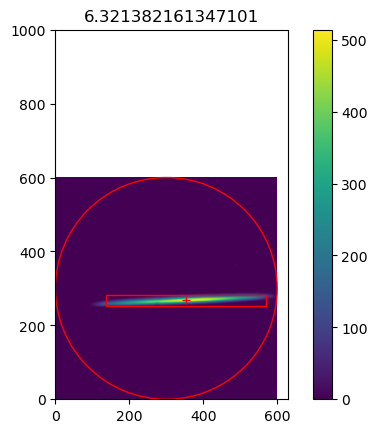

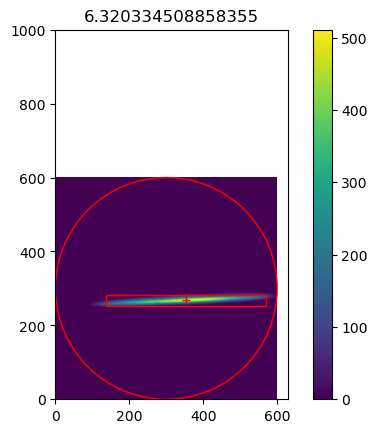

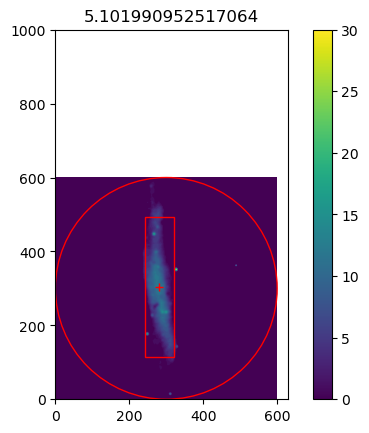

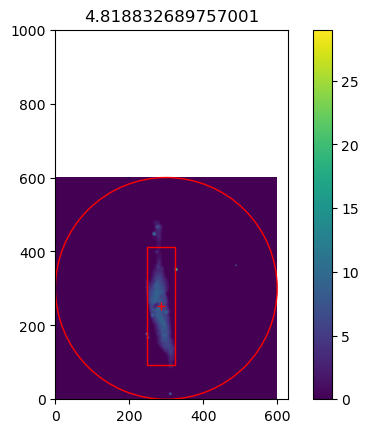

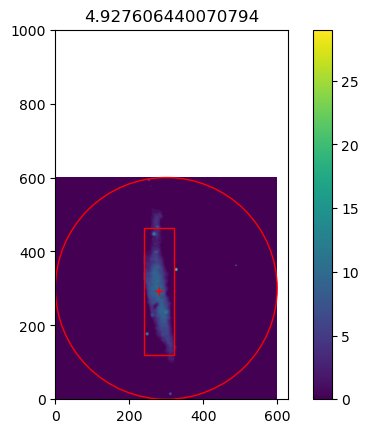

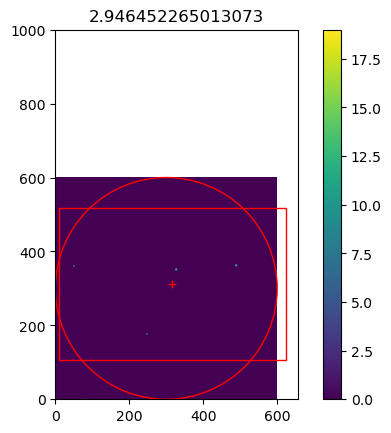

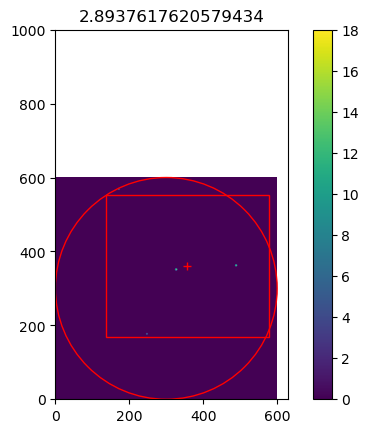

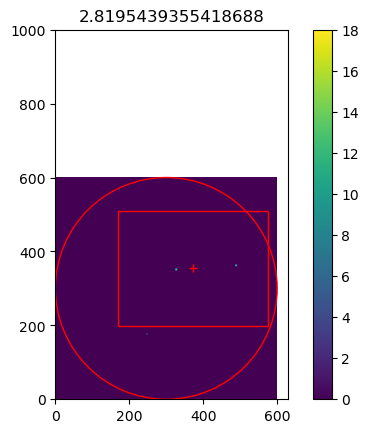

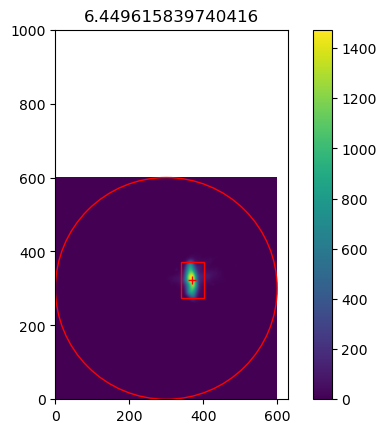

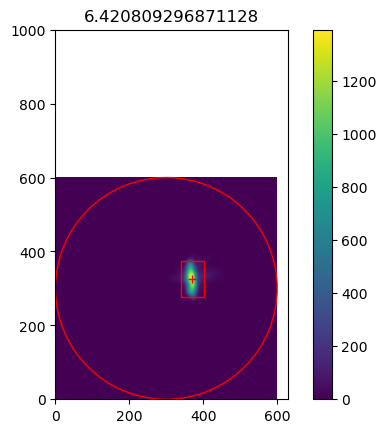

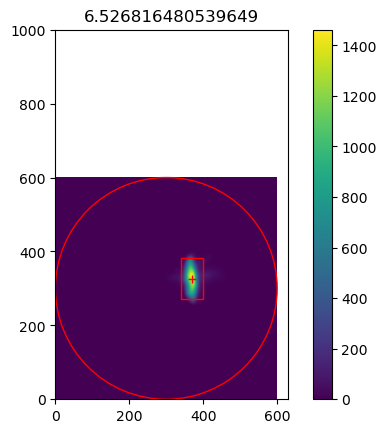

Error in callback <function flush_figures at 0x7efcaf177a60> (for post_execute):


KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt
from IPython import display
import time
while 1:
    display.clear_output(wait=True)
    meas = env.get_screen_measurement("13ARV1",['13ARV1:Sx', 'AWAVXI11ICT:Ch1'], visualize=True)
    fig = plt.gcf()
    fig.gca().set_title(meas["13ARV1:log10_total_intensity"])
    display.display(fig)
